# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | qamdo
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | upper grand lagoon
Processing Record 15 of Set 1 | aswan
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | katima mulilo
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | garissa
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | saint-joseph


In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,49.91,59,78,21.39,SH,1696304844
1,bredasdorp,-34.5322,20.0403,54.64,95,4,4.21,ZA,1696304844
2,bilibino,68.0546,166.4372,22.96,95,90,2.01,RU,1696304844
3,constantia,44.1833,28.6500,52.70,57,1,8.43,RO,1696304845
4,bethel,41.3712,-73.4140,61.65,88,0,3.44,US,1696304762


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,49.91,59,78,21.39,SH,1696304844
1,bredasdorp,-34.5322,20.0403,54.64,95,4,4.21,ZA,1696304844
2,bilibino,68.0546,166.4372,22.96,95,90,2.01,RU,1696304844
3,constantia,44.1833,28.6500,52.70,57,1,8.43,RO,1696304845
4,bethel,41.3712,-73.4140,61.65,88,0,3.44,US,1696304762


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

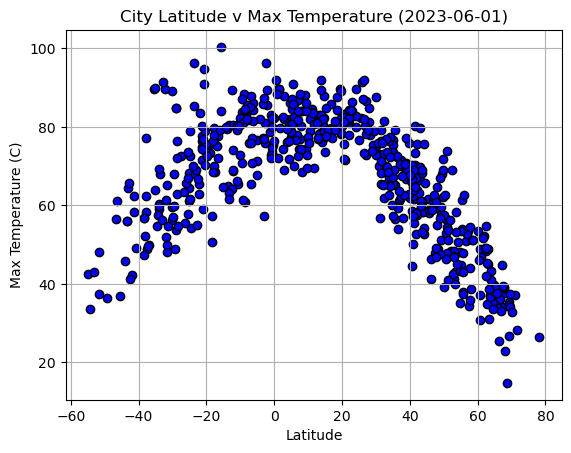

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude v Max Temperature (2023-06-01)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

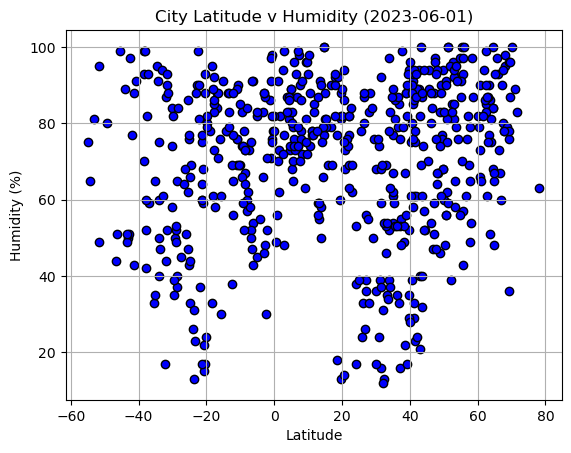

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude v Humidity (2023-06-01)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

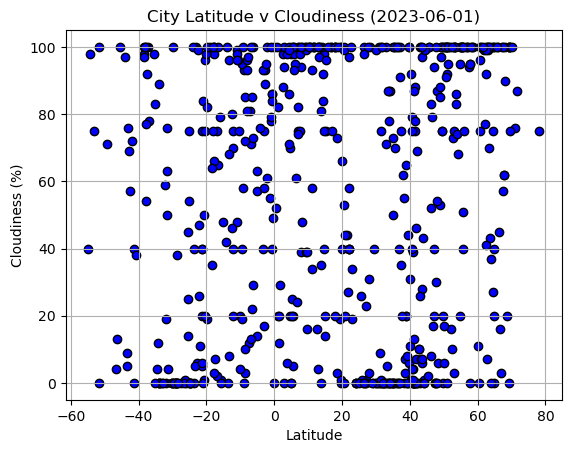

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude v Cloudiness (2023-06-01)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

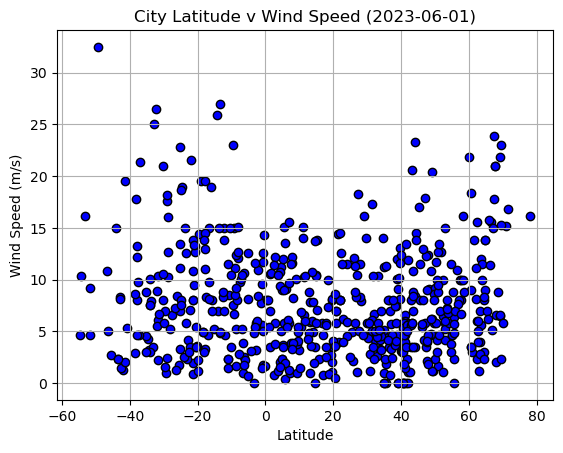

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude v Wind Speed (2023-06-01)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_lin(df, condition1, condition2):
    slope, int, r, p, st_err = linregress(df[condition1], df[condition2])
    fit = slope * df[condition1] + int
    str_fit = f'y = {slope:.2f}x + {int:.2f}'
    plt.scatter(df[condition1], df[condition2])
    plt.xlabel(condition1)
    plt.ylabel(condition2)
    plt.plot(df[condition1], fit, color = 'red')
    print(f'The r value is: {r}')
    
    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(xmin + 10, ymin + 10, str_fit, color = 'red')

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,22.96,95,90,2.01,RU,1696304844
3,constantia,44.1833,28.6500,52.70,57,1,8.43,RO,1696304845
4,bethel,41.3712,-73.4140,61.65,88,0,3.44,US,1696304762
5,tura,25.5198,90.2201,82.15,78,26,4.97,IN,1696304845
8,qamdo,31.1667,97.2333,56.86,39,9,4.83,CN,1696304845


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,49.91,59,78,21.39,SH,1696304844
1,bredasdorp,-34.5322,20.0403,54.64,95,4,4.21,ZA,1696304844
6,adamstown,-25.0660,-130.1015,68.16,76,54,22.82,PN,1696304618
7,margaret river,-33.9500,115.0667,58.98,60,89,10.07,AU,1696304845
9,port mathurin,-19.6833,63.4167,74.50,80,19,14.45,MU,1696304845


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8772327942877005


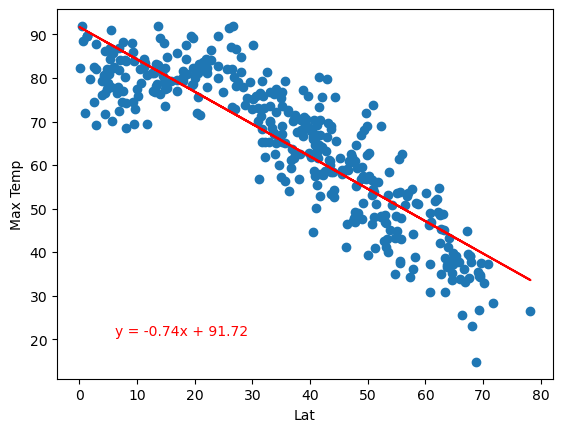

In [33]:
# Linear regression on Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Max Temp')

The r value is: 0.658769490671508


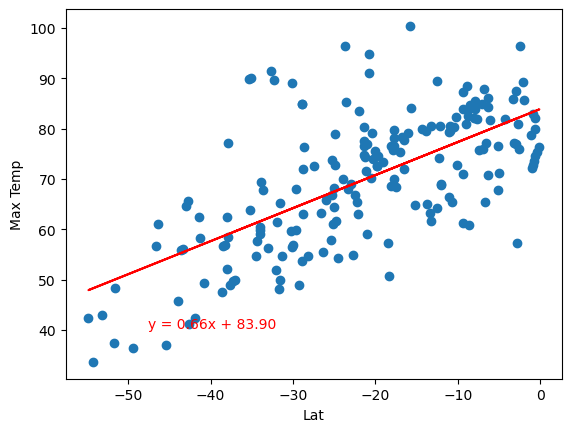

In [34]:
# Linear regression on Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** In the northern hemisphere, as latitude increases, max temp decreases. This makes sense because more northern countries above the northern hemisphere have colder temperatures. Then, as the southern hemisphere latitude increases, max temperature increases. This also makes sense because below the southern hemisphere, temperature increases with latitude. Both correlations are strong.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.04752283702534347


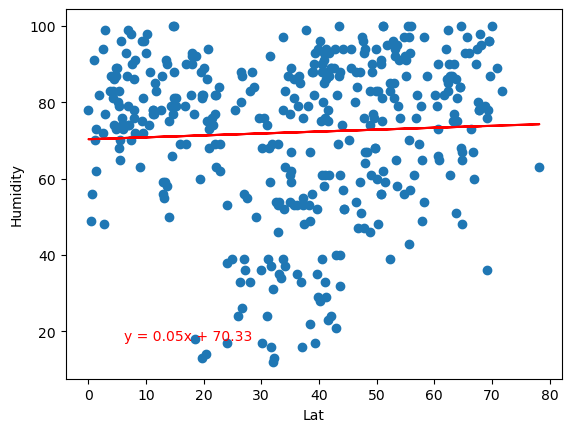

In [35]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Humidity')

The r value is: 0.0901313332514327


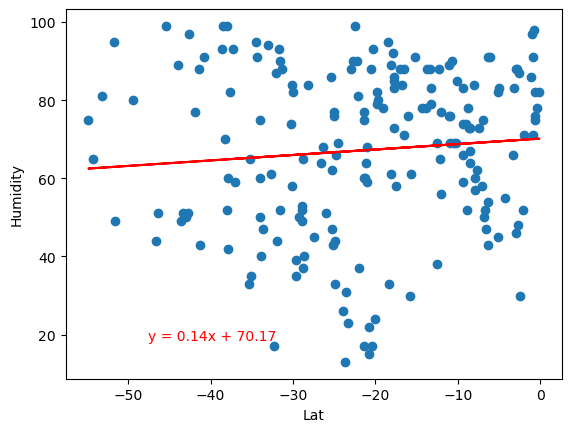

In [36]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** Both correlations for the northern and souther hemispher are fairly weak, r = .10 for northern hemisphere, r = -.03 for southern hemisphere. Therefore, latitude and humidity have a  weak correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.055119000683138915


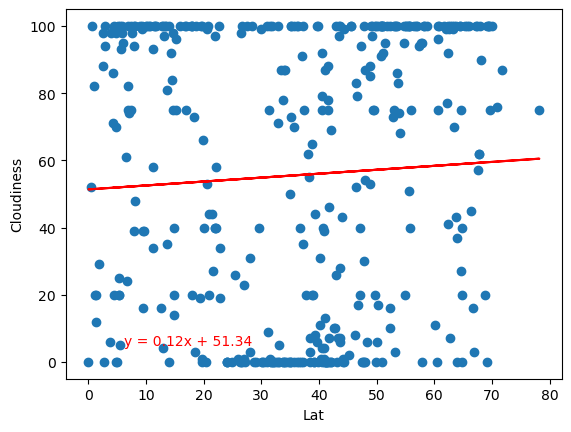

In [37]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Cloudiness')

The r value is: 0.1962939622499458


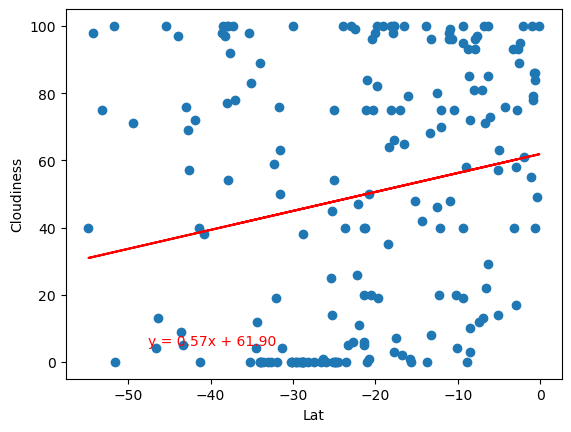

In [38]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** There is a bigger correlation in the southern hemisphere than there is in the northern hemisphere. Latitude and cloudiness have a stronger relationship in the south than in the north

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.1896970431078371


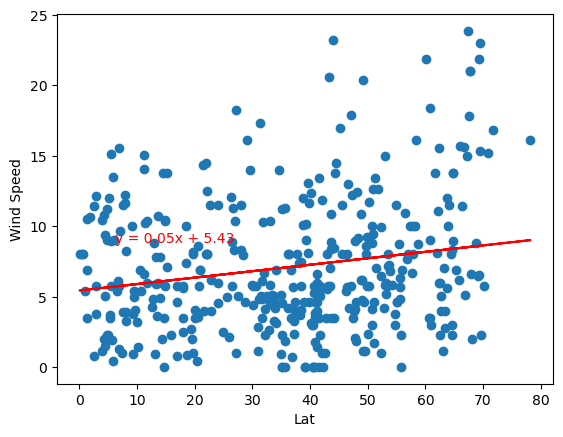

In [39]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Wind Speed')

The r value is: -0.07987707333512108


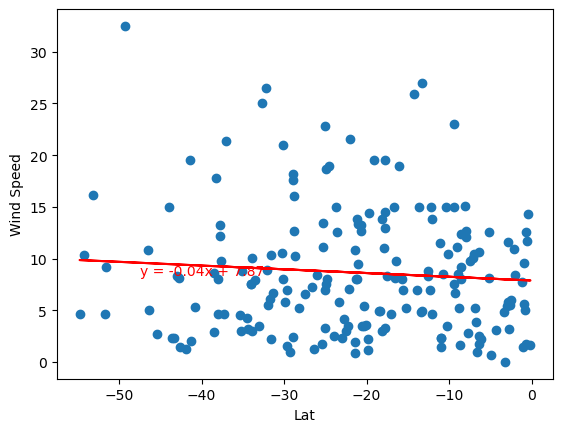

In [40]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:**  The r values are realativly small for both northern and southern hemispheres, -.02 and -.25. We can gather that latitude and wind speed have very weak correlations